In [19]:
import os
import PIL
import cv2
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [20]:
# # To Download flower_photos dataset
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='./Dataset', untar=True)

In [21]:
data_dir = pathlib.Path("E:/Dataset/flower_photos")
data_dir

WindowsPath('E:/Dataset/flower_photos')

In [22]:
len(list(data_dir.glob('*/*.jpg'))), len(list(data_dir.glob('roses/*')))

(3670, 641)

In [23]:
flower_dict = {
'roses' : list(data_dir.glob('roses/*')),
'tulips' : list(data_dir.glob('tulips/*')),
'dandelion' : list(data_dir.glob('dandelion/*')),
'daisy' : list(data_dir.glob('daisy/*')),
'sunflowers' : list(data_dir.glob('sunflowers/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [24]:
img = cv2.imread(str(flower_dict['roses'][0]))
img.shape

(240, 179, 3)

In [25]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [26]:
X, y = [], []

for flower_name, images in flower_dict.items():
    print(flower_name, ":", len(images))
    for image in images:
        img = cv2.imread(str(image))
        resize_image = cv2.resize(img, (180, 180))
        X.append(resize_image)
        y.append(flowers_labels_dict[flower_name])

roses : 641
tulips : 799
dandelion : 898
daisy : 633
sunflowers : 699


In [27]:
X = np.array(X)
y = np.array(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1, 2, 3, 4]), array([465, 491, 683, 515, 598], dtype=int64)),
 (array([0, 1, 2, 3, 4]), array([176, 142, 215, 184, 201], dtype=int64)))

In [29]:
X_train_scl = X_train / 255
X_test_scl = X_test / 255
len(X_train_scl), len(y_train)

(2752, 2752)

In [30]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, 3, padding= 'same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32, 3, padding= 'same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, 3, padding= 'same', activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(5))

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [31]:
history = model.fit(X_train_scl, y_train, epochs =10)

Epoch 1/10
86/86 [==============================] - 9s 84ms/step - loss: 1.3175 - accuracy: 0.4422
Epoch 2/10
86/86 [==============================] - 7s 84ms/step - loss: 0.9960 - accuracy: 0.6094
Epoch 3/10
86/86 [==============================] - 7s 82ms/step - loss: 0.8320 - accuracy: 0.6810
Epoch 4/10
86/86 [==============================] - 7s 82ms/step - loss: 0.6274 - accuracy: 0.7605
Epoch 5/10
86/86 [==============================] - 7s 82ms/step - loss: 0.4405 - accuracy: 0.8408
Epoch 6/10
86/86 [==============================] - 7s 82ms/step - loss: 0.2510 - accuracy: 0.9204
Epoch 7/10
86/86 [==============================] - 7s 82ms/step - loss: 0.1526 - accuracy: 0.9542
Epoch 8/10
86/86 [==============================] - 7s 82ms/step - loss: 0.0858 - accuracy: 0.9753
Epoch 9/10
86/86 [==============================] - 7s 82ms/step - loss: 0.0422 - accuracy: 0.9927
Epoch 10/10
86/86 [==============================] - 7s 82ms/step - loss: 0.0297 - accuracy: 0.9953


In [32]:
model.evaluate(X_test_scl, y_test)

29/29 [==============================] - 1s 33ms/step - loss: 1.7942 - accuracy: 0.6623


[1.794152855873108, 0.6623093485832214]

In [33]:
IMG_SIZE = 180

data_augmentation = tf.keras.Sequential([
#     keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
#     keras.layers.experimental.preprocessing.Rescaling(1./255),
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [34]:
# Add the image to a batch
image = tf.expand_dims(X[0], 0)
image.shape,X[0].shape

(TensorShape([1, 180, 180, 3]), (180, 180, 3))

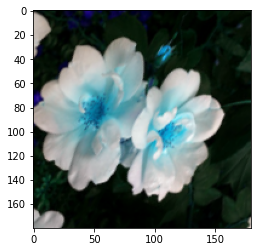

In [35]:
result = data_augmentation(image)
_ = plt.imshow(result[0])

In [36]:
num_classes = 5
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.fit(X_train_scl, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 9s 96ms/step - loss: 1.2964 - accuracy: 0.4415
Epoch 2/30
86/86 [==============================] - 8s 94ms/step - loss: 1.0960 - accuracy: 0.5585
Epoch 3/30
86/86 [==============================] - 8s 94ms/step - loss: 0.9942 - accuracy: 0.5977
Epoch 4/30
86/86 [==============================] - 8s 97ms/step - loss: 0.9284 - accuracy: 0.6337
Epoch 5/30
86/86 [==============================] - 8s 95ms/step - loss: 0.8786 - accuracy: 0.6664
Epoch 6/30
86/86 [==============================] - 8s 96ms/step - loss: 0.8336 - accuracy: 0.6730
Epoch 7/30
86/86 [==============================] - 8s 94ms/step - loss: 0.8060 - accuracy: 0.6802
Epoch 8/30
86/86 [==============================] - 9s 99ms/step - loss: 0.7820 - accuracy: 0.6908
Epoch 9/30
86/86 [==============================] - 8s 95ms/step - loss: 0.7808 - accuracy: 0.6973
Epoch 10/30
86/86 [==============================] - 8s 94ms/step - loss: 0.7482 - accuracy: 0.7104
Epoch 11/

In [42]:
model.evaluate(X_test_scl, y_test)

29/29 [==============================] - 1s 29ms/step - loss: 0.6920 - accuracy: 0.7440


[0.6920143961906433, 0.7440087199211121]

In [46]:
num_classes = 5
model1 = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [40]:
model1.fit(X_train_scl, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 14s 117ms/step - loss: 1.5625 - accuracy: 0.2783
Epoch 2/50
86/86 [==============================] - 11s 123ms/step - loss: 1.2101 - accuracy: 0.4949
Epoch 3/50
86/86 [==============================] - 10s 122ms/step - loss: 1.0858 - accuracy: 0.5672
Epoch 4/50
86/86 [==============================] - 11s 128ms/step - loss: 1.0180 - accuracy: 0.5908
Epoch 5/50
86/86 [==============================] - 12s 142ms/step - loss: 0.9606 - accuracy: 0.6061
Epoch 6/50
86/86 [==============================] - 12s 140ms/step - loss: 0.9488 - accuracy: 0.6134
Epoch 7/50
86/86 [==============================] - 12s 138ms/step - loss: 0.9167 - accuracy: 0.6330
Epoch 8/50
86/86 [==============================] - 11s 128ms/step - loss: 0.8843 - accuracy: 0.6493
Epoch 9/50
86/86 [==============================] - 11s 125ms/step - loss: 0.8484 - accuracy: 0.6642
Epoch 10/50
86/86 [==============================] - 11s 128ms/step - loss: 0.8360 - accura

In [43]:
model1.evaluate(X_test_scl, y_test)

29/29 [==============================] - 1s 28ms/step - loss: 0.8424 - accuracy: 0.7277


[0.8423945307731628, 0.727668821811676]

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       